### 您以經寫了一個爬蟲可以抓取世界衛生組織2017年的疫情爆發新聞，目前已經將資料整理在一 csv 檔 ( https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/who_sample.xlsx )，資料範例如下方表格，為了能讓抓取下來的國際疫情資料變得更好分析，請：

,date,link,title
0,6 September 2017,http://www.who.int/entity/csr/don/6-september-...,Middle East respiratory syndrome coronavirus (...
1,5 September 2017,http://www.who.int/entity/csr/don/5-september-...,Human infection with avian influenza A(H7N9) v...
2,30 August 2017,http://www.who.int/entity/csr/don/30-august-20...,Yellow fever ??? France ??? French Guiana


1. 使用Pandas 讀取 excel 的資料，並將資料放置一名為who 的DataFrame 之中
2. 抽取出標題(title)中所敘述的疾病名稱，並將該疾病另存成一名為disease 的欄位
   - e.g. Human infection with avian influenza A(H7N9) virus – China 須抽取出 H7N9 並將之放入disease 欄位
3. 使用pandas 的to_datetime 功能將date 欄位從字串格式(object)轉換為時間格式(datetime)
4. 根據新聞月份統計各疾病(disease)出現數量



## 答案一

In [2]:
import pandas
who = pandas.read_excel('who_sample.xlsx')
who.head()

,date,link,title
0,6 September 2017,http://www.who.int/entity/csr/don/6-september-...,Middle East respiratory syndrome coronavirus (...
1,5 September 2017,http://www.who.int/entity/csr/don/5-september-...,Human infection with avian influenza A(H7N9) v...
2,30 August 2017,http://www.who.int/entity/csr/don/30-august-20...,Yellow fever ??? France ??? French Guiana
3,28 August 2017,http://www.who.int/entity/csr/don/28-august-20...,Middle East respiratory syndrome coronavirus (...
4,25 August 2017,http://www.who.int/entity/csr/don/25-august-20...,Chikungunya ??? France


## 答案二

In [7]:
s = 'Human infection with avian influenza A(H7N9) virus – China ' 

import re
m = re.search('\((.+)\)', s)
m.group(1)

'H7N9'

In [9]:
who['disease'] = who['title'].str.extract('\((.+)\)', expand=False)

In [11]:
#who

## 答案三

### 參考 strptime 符號用法
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [15]:
d = '6 September 2017'
from datetime import datetime
datetime.strptime(d,'%d %B %Y')

datetime.datetime(2017, 9, 6, 0, 0)

In [19]:
who['date'] = pandas.to_datetime(who['date'], format = '%d %B %Y')

In [24]:
#datetime.now() - who['date']

0     14 days 11:15:57.113651
1     15 days 11:15:57.113651
2     21 days 11:15:57.113651
3     23 days 11:15:57.113651
4     26 days 11:15:57.113651
5     34 days 11:15:57.113651
6     44 days 11:15:57.113651
7     47 days 11:15:57.113651
8     61 days 11:15:57.113651
9     63 days 11:15:57.113651
10    63 days 11:15:57.113651
11    70 days 11:15:57.113651
12    70 days 11:15:57.113651
13    76 days 11:15:57.113651
14    76 days 11:15:57.113651
15    78 days 11:15:57.113651
16    84 days 11:15:57.113651
17    84 days 11:15:57.113651
18    84 days 11:15:57.113651
19    93 days 11:15:57.113651
20    99 days 11:15:57.113651
21    99 days 11:15:57.113651
22    99 days 11:15:57.113651
23   104 days 11:15:57.113651
24   105 days 11:15:57.113651
25   106 days 11:15:57.113651
26   117 days 11:15:57.113651
27   120 days 11:15:57.113651
28   125 days 11:15:57.113651
29   130 days 11:15:57.113651
               ...           
38   168 days 11:15:57.113651
39   169 days 11:15:57.113651
40   169 d

##  答案四

In [54]:
#who['date'].dt.month
# SELECT count(disease), MONTH(date) FROM WHO GROUP BY MONTH(date)
who_stat  = who.groupby([who['date'].dt.month, 'disease'])['disease'].count()

In [56]:
whodf = who_stat.to_frame()
whodf.columns = ['cnt']
#whodf
pandas.pivot_table(whodf, index='date', columns='disease', values='cnt')
pandas.pivot_table(whodf, index='disease', columns='date', values='cnt')
#pandas.pivot_table(who_stat, index = 'date')

date,1,2,3,4,5,6,7,8,9
disease,,,,,,,,,
H7N9,3.0,3.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0
MERS-CoV,2.0,1.0,1.0,4.0,NaN,4.0,2.0,2.0,1.0


# 修正版本的答案

In [61]:
import pandas
who = pandas.read_excel('who_sample.xlsx')
who.head()

,date,link,title
0,6 September 2017,http://www.who.int/entity/csr/don/6-september-...,Middle East respiratory syndrome coronavirus (...
1,5 September 2017,http://www.who.int/entity/csr/don/5-september-...,Human infection with avian influenza A(H7N9) v...
2,30 August 2017,http://www.who.int/entity/csr/don/30-august-20...,Yellow fever ??? France ??? French Guiana
3,28 August 2017,http://www.who.int/entity/csr/don/28-august-20...,Middle East respiratory syndrome coronavirus (...
4,25 August 2017,http://www.who.int/entity/csr/don/25-august-20...,Chikungunya ??? France


In [63]:
who['disease'] = who['title'].map(lambda e: e.split(' ??? ', 1)[0])
who['date'] = pandas.to_datetime(who['date'], format = '%d %B %Y')

In [64]:
who_stat  = who.groupby([who['date'].dt.month, 'disease'])['disease'].count()

In [65]:
whodf = who_stat.to_frame()
whodf.columns = ['cnt']
pandas.pivot_table(whodf, index='disease', columns='date', values='cnt')

date,1,2,3,4,5,6,7,8,9
disease,,,,,,,,,
Acute hepatitis E,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Chikungunya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Cholera,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Circulating vaccine-derived poliovirus type 2,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Dengue fever,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Ebola virus disease,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Hepatitis A outbreaks mostly affecting men who have sex with men,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Hepatitis E,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Human infection with avian influenza A(H7N9) virus,3.0,3.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0


# 取得多年版本的資料

In [66]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [91]:
import requests
import pandas
from bs4 import BeautifulSoup
from datetime import datetime

who_list = []
domain = 'http://www.who.int'
url = 'http://www.who.int/csr/don/archive/year/{}/en/'
for year in range(1996, 2018):
    #print(year)
    # 存取頁面
    res = requests.get(url.format(year))
    # 轉換編碼
    res.encoding = 'utf-8'
    # 將資料丟進剖析器
    soup = BeautifulSoup(res.text, 'html.parser')
    
    for content in soup.select('.auto_archive li'):
        dic       = {}
        dic['dt']        = content.select('a')[0].text

        # 增加搜尋時間
        dic['search_dt'] = datetime.now()

        dic['link']      = domain + content.select('a')[0]['href']
        dic['link_info'] = content.select('.link_info')[0].text
        who_list.append(dic)

In [132]:
whodf = pandas.DataFrame(who_list)
whodf.count()

dt           2595
link         2595
link_info    2595
search_dt    2595
dtype: int64

In [133]:
whodf.head()

,dt,link,link_info,search_dt
0,24 December 1996,http://www.who.int/entity/csr/don/1996_12_24/e...,1996 - Ebola haemorrhagic fever in Gabon (new ...,2017-09-20 11:55:02.880049
1,20 December 1996,http://www.who.int/entity/csr/don/1996_12_20/e...,1996 - Ebola haemorrhagic fever in Gabon (new ...,2017-09-20 11:55:02.881049
2,13 December 1996,http://www.who.int/entity/csr/don/1996_12_13a/...,1996 - Cholera in Rwanda and Zaire,2017-09-20 11:55:02.881049
3,13 December 1996,http://www.who.int/entity/csr/don/1996_12_13b/...,1996 - E.coli O157 infection in UK,2017-09-20 11:55:02.882049
4,6 December 1996,http://www.who.int/entity/csr/don/1996_12_06a/...,1996 - Ebola haemorrhagic fever in Gabon (new ...,2017-09-20 11:55:02.882049


In [134]:
import re
def DiseaseParser(rec):
    try:
        m1 = re.match('^\d+ - (.+?) in (.*)', rec)
        if m1:
            disease = m1.group(1)
            country = m1.group(2)
        else:
            disease, country  = rec.split(' – ', 1)
        return disease.lower(), country.lower()
    except:
        #print(rec)
        return None, None


In [135]:
whodf['disease'] = whodf['link_info'].map(lambda e: DiseaseParser(e)[0])
whodf['country'] = whodf['link_info'].map(lambda e: DiseaseParser(e)[1])

In [136]:
df = whodf[['link', 'disease', 'dt', 'country', 'search_dt']]
df.head()

,link,disease,dt,country,search_dt
0,http://www.who.int/entity/csr/don/1996_12_24/e...,ebola haemorrhagic fever,24 December 1996,gabon (new outbreak) - update 9,2017-09-20 11:55:02.880049
1,http://www.who.int/entity/csr/don/1996_12_20/e...,ebola haemorrhagic fever,20 December 1996,gabon (new outbreak) - update 8,2017-09-20 11:55:02.881049
2,http://www.who.int/entity/csr/don/1996_12_13a/...,cholera,13 December 1996,rwanda and zaire,2017-09-20 11:55:02.881049
3,http://www.who.int/entity/csr/don/1996_12_13b/...,e.coli o157 infection,13 December 1996,uk,2017-09-20 11:55:02.882049
4,http://www.who.int/entity/csr/don/1996_12_06a/...,ebola haemorrhagic fever,6 December 1996,gabon (new outbreak) - update 7,2017-09-20 11:55:02.882049


In [137]:
df['date'] = pandas.to_datetime(df['dt'], format = '%d %B %Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head(1)

,link,disease,dt,country,search_dt,date,year,month
0,http://www.who.int/entity/csr/don/1996_12_24/e...,ebola haemorrhagic fever,24 December 1996,gabon (new outbreak) - update 9,2017-09-20 11:55:02.880049,1996-12-24,1996,12


In [138]:
who_stat  = df.groupby([df['year'], df['month'] , 'disease'])['disease'].count()

In [141]:
whodf = who_stat.to_frame()
whodf.columns = ['cnt']
whodf.head()
who_pivot_tb = pandas.pivot_table(whodf, index='disease', columns=['year', 'month'], values='cnt')

In [142]:
who_pivot_tb.to_csv('who_stat.csv')

## 繪製資料趨勢

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


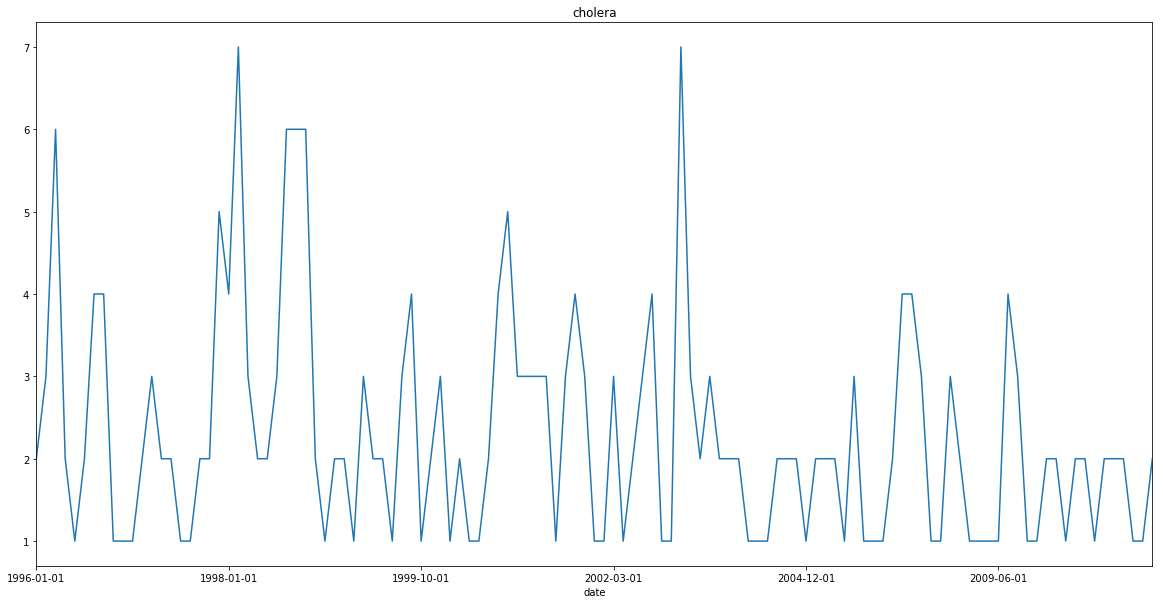

In [131]:
whodf = pandas.DataFrame(who_list)
%pylab inline
def plotTrend(keyword):
    df = whodf[whodf['link_info'].map(lambda e: True if keyword in str(e).lower() else False)]
    df['date'] = pandas.to_datetime(df['dt'], format = '%d %B %Y')
    who_stat  = df.groupby([df['date'].dt.strftime('%Y-%m-01')])['link_info'].count()
    who_stat.plot(kind= 'line', figsize = [20,10], title= keyword)
plotTrend('cholera')